In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

# TRABALHO COMPUTACIONAL 2 - OTIMIZAÇÃO NÃO-LINEAR

## Alunos:

Lucas Samuel Fernandes Andrade Oliveira 2021019548

Maria Clara Oliveira Domingos Ruas 2021019572


# QUESTÃO 1

Nesta questão, iremos utilizar o método de penalidades exterior, seguindo a modelagem:

\begin{align}
x^* = \argmin~&f(a, b, c) = 1.5(2ab + 2ac + 2bc) \\
    \mathrm{sujeito~a~} & 
        \begin{cases} h_1(\mathbf{a, b, c}):~& a * b * c - 0.032 \\ g_1(\mathbf{a, b, c}):~& 2 * (a + b) - 1.5 \le 0 \\ g_2(\mathbf{a, b, c}):~& b - 3 * a \le 0 
        \\ g_3(\mathbf{a, b, c}):~& c - (2 / 3) * b \le 0\\ g_4(\mathbf{a, b, c}):~& a - 0.5 \le 0\\ g_5(\mathbf{a, b, c}):~& -a \le 0
        \\ g_6(\mathbf{a, b, c}):~& b - 0.5 \le 0\\ g_7(\mathbf{a, b, c}):~& -b \le 0\\ g_8(\mathbf{a, b, c}):~& -c \le 0\end{cases}

\end{align}

Para a definição da nova função objetivo, devemos alterar a função objetivo para um problema equivalente irrestrito, seguindo a definição:

\begin{align}
    min f(x)+u\sum_{i=1}^{l}max[0,g_{i}(x)]^{2}+u\sum_{j=1}^{m}[h_{j}(x)]^{2}
\end{align}


In [412]:
# Definição das funções
def funcobj(vars):
    a, b, c = vars[0], vars[1], vars[2]   
    return 3 * (a * b + a * c + b * c)

def h1(vars):
    a, b, c, u = vars[0], vars[1], vars[2], vars[3]
    return u*(a * b * c - 0.032) ** 2

def g1(vars):
    a, b, u = vars[0], vars[1], vars[2]
    return u*max(0, 2 * (a + b) - 1.5) ** 2

def g2(vars):
    a, b, u = vars[0], vars[1], vars[2]
    return u*max(0, b - 3 * a) ** 2

def g3(vars):
    b, c, u = vars[0], vars[1], vars[2]
    return u*max(0, c - (2 / 3) * b) ** 2

def g4(vars):
    a, u = vars[0], vars[1]
    return u*max(0, a - 0.5) ** 2

def g5(vars):
    a, u = vars[0], vars[1]
    return u*max(0, -a) ** 2

def g6(vars):
    b, u = vars[0], vars[1]
    return u*max(0, b - 0.5) ** 2

def g7(vars):
    b, u = vars[0], vars[1]
    return u*max(0, -b) ** 2

def g8(vars):
    c, u = vars[0], vars[1]
    return u*max(0, -c) ** 2

Agora, iniciasse o processo iterativo, utilizando como método de otimização o BFGS.
Ao final do processo, é realizada uma comparação com o ponto ótimo oferecido como referência, juntamente com seus valores na função objetivo do problema restrito e do irrestrito.

In [416]:
# Parâmetros
precisao = 1e-4 # Precisão: percentual de diferença de x entre duas gerações
u = 1. # Valor inicial de u
alpha = 1.2 # Aceleração do valor de u
xlast = np.array([np.inf, np.inf, np.inf]) # Último valor de u
iteracoes = 1 # Contador de iterações
x0 = np.array([.2, .2, .8], dtype=float) # Ponto Inicial


while True:
    
    # Define a nova função-objetivo
    def fh(vars):
        a, b, c = vars[0], vars[1], vars[2]
        return funcobj([a, b, c]) + g1([a, b, u]) + g2([a, b, u]) + g3([b, c, u]) + g4([a, u]) + g5([a, u]) + g6([b, u]) + g7([b, u]) + g8([c, u]) + h1([a, b, c, u])
        
    
    # Determina o ponto de ótimo através de um método de otimização irrestrita
    solution = optimize.minimize(fh, x0, method='BFGS')
    xopt = solution.x 
    fopt = solution.fun
    
    # Se o percentual de diferença entre os dois últimos ótimos forem muito pequenos, pare
    if np.linalg.norm((xopt-xlast)/xopt) < precisao:
        break
    
    # Senão, aumente u
    else:
        xlast = xopt
        u = alpha*u
        iteracoes += 1


xOt = np.array([0.3132, 0.391, 0.2607], dtype=float)

# Exibe resultado
print('RESULTADO')
print('x-ótimo: ' + str(xopt))
print('Valor final de u: %.1f' % u)
print('Número de iterações: %d' % iteracoes) 

print("PROBLEMA IRRESTRITO")
print("Valor encontrado Fh:" + str(fh(xopt)))
print("Valor ótimo Fh:" + str(fh(xOt)))

print("PROBLEMA RESTRITO")
print("Valor encontrado:" + str(funcobj(xopt)))
print("Valor ótimo:" + str(funcobj(xOt)))

print("ERRO:")
print(str(100*((funcobj(xopt)-funcobj(xOt))/funcobj(xopt))) + "%")

RESULTADO
x-ótimo: [0.31369951 0.39109579 0.26073065]
Valor final de u: 723456.1
Número de iterações: 75
PROBLEMA IRRESTRITO
Valor encontrado Fh:0.9194465525301706
Valor ótimo Fh:0.9229431006845523
PROBLEMA RESTRITO
Valor encontrado:0.9193448734568985
Valor ótimo:0.9181384199999999
ERRO
0.13122969320121936%


# QUESTÃO 2

Para essa segunda questão, seguiremos a modelagem:

\begin{align}
x^* = min f(x_{1},x_{2})=(2\sqrt{2})x_{1}+x_{2} \\
    \mathrm{sujeito~a~} & 
        \begin{cases} 
            g_1(\mathbf{x_{1}, x_{2}}):~& P\tfrac{x_{2}+x_{1}\sqrt{2}}{x_{1}^{2}\sqrt{2}+2x_{1}x_{2}}\leq 20\\ 
            g_2(\mathbf{x_{1}, x_{2}}):~&  P\tfrac{1}{x_{1}+x_{2}\sqrt{2}}\leq 20\\  
            g_3(\mathbf{x_{1}, x_{2}}):~& -P\tfrac{x_{2}}{x_{1}^{2}\sqrt{2}+2x_{1}x_{2}}\leq-15\\ 
            g_4(\mathbf{x_{1}, x_{2}}):~& 0.1 - x_{1}\leq 0 \\
            g_5(\mathbf{x_{1}, x_{2}}):~& 0.1 - x_{2}\leq 0 \\
            g_6(\mathbf{x_{1}, x_{2}}):~& x_{1}-5\leq 0 \\
            g_7(\mathbf{x_{1}, x_{2}}):~& x_{2}-5\leq 0
        \end{cases}

\end{align}

Primeiramente, iremos mostrar graficamente o problema para uma melhor visão. As linhas em verde-água representam o nível 0 das restrições, e as em azul o nível -2. Como todas as restrições no final devem ser negativas, a região factível de cada restrição é a região que contém a linha azul partindo da linha verde-água, e a intersecção de todas essas regiões é a do problema total.


Valor encontrado em g1: 0.0010158244738001088
Valor encontrado em g2: -2.9984694170537276
Valor encontrado em g3: 0.0008981365780762474


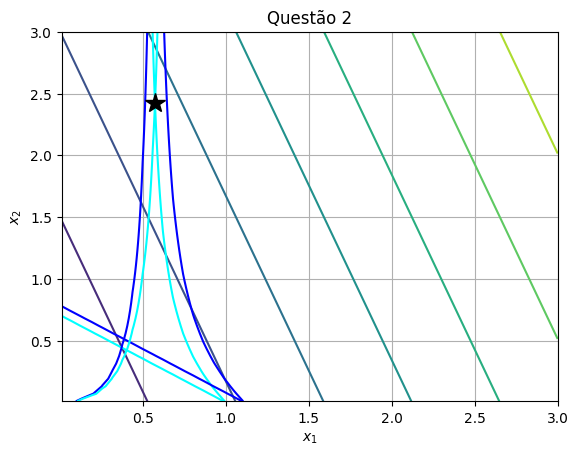

In [434]:
# Malha de pontos para gráfico de contorno
x1, x2 = np.meshgrid(np.linspace(0.01, 3),
                     np.linspace(0.01, 3))

# Função objetivo
f =  (2*( 2** 0.5))*x1 + x2

# Adiciona o contorno na figura
plt.contour(x1, x2, f)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Questão 2')
plt.grid()

# Calcula e exibe curva de restrição gi(x)

g1 = -20 + 20*((x2 + (2 ** 0.5)*x1)/((x1**2)*( 2** 0.5) + 2*x1*x2))
g2 = -20 + 20/(x1 + ( 2** 0.5)*x2)
g3 = 15 - 20*((x2)/((x1**2)*( 2** 0.5) + 2*x1*x2))

g4 = 0.01 - x1
g5 = 0.01 - x2
g6 = x1 - 5
g7 = x2 - 5


plt.contour(x1, x2, g1, levels=[-2, 0], colors=['blue', 'aqua'])
plt.contour(x1, x2, g2, levels=[-2, 0], colors=['blue', 'aqua'])
plt.contour(x1, x2, g3, levels=[-2, 0], colors=['blue', 'aqua'])
plt.contour(x1, x2, g4, levels=[0], colors=['black'])
plt.contour(x1, x2, g5, levels=[0], colors=['purple'])
plt.contour(x1, x2, g6, levels=[0], colors=['green'])
plt.contour(x1, x2, g7, levels=[0], colors=['yellow'])

plt.plot(0.57142665, 2.42328518, '*k', label='Ótimo', markersize=15)

x1 = 0.57142665
x2 = 2.42328518

g1 = -20 + 20*((x2 + (2 ** 0.5)*x1)/((x1**2)*( 2** 0.5) + 2*x1*x2))
g2 = 1 - x1 - ( 2** 0.5)*x2
g3 = 15 - 20*((x2)/((x1**2)*( 2** 0.5) + 2*x1*x2))


#Valores das restrições no ponto ótimo (observação que o ponto está um pouco fora da região factivel, ou seja, ele chega na região pelo exterior)
print("Valor encontrado em g1: " + str(g1))
print("Valor encontrado em g2: " + str(g2))
print("Valor encontrado em g3: " + str(g3))

plt.show()

Para melhor visualização, vamos aumentar o zoom para que possamos ver onde o ponto ótimo está em relação às linhas das restrições.Podemos observar que o ponto se encontra exatamente na intersecção das linhas, chegando pelo exterior da região factível (por baixo).

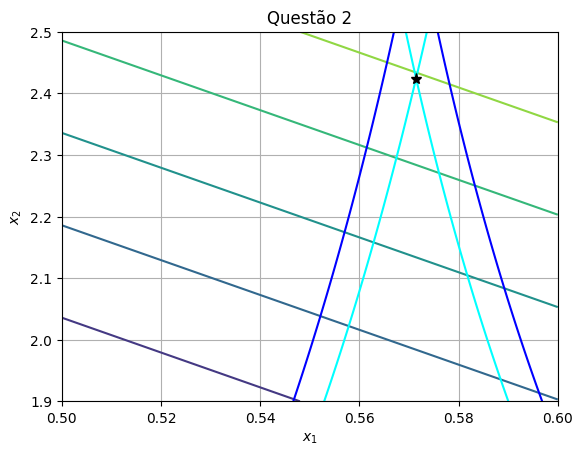

In [433]:
# Malha de pontos para gráfico de contorno
x1, x2 = np.meshgrid(np.linspace(0.5, 0.6),
                     np.linspace(1.9, 2.5))

# Função objetivo
f =  (2*( 2** 0.5))*x1 + x2

# Adiciona o contorno na figura
plt.contour(x1, x2, f)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Questão 2')
plt.grid()

# Calcula e exibe curvas de restrição gi(x)

g1 = -20 + 20*((x2 + (2 ** 0.5)*x1)/((x1**2)*( 2** 0.5) + 2*x1*x2))
g2 = -20 + 20/(x1 + ( 2** 0.5)*x2)
g3 = 15 - 20*((x2)/((x1**2)*( 2** 0.5) + 2*x1*x2))


plt.contour(x1, x2, g1, levels=[-.2, 0], colors=['blue', 'aqua'])
plt.contour(x1, x2, g3, levels=[-.2, 0], colors=['blue', 'aqua'])


plt.plot(0.57142665, 2.42328518, '*k', label='Ótimo', markersize=8)



### Definição das Funções

Aqui, definimos todas as funções deixando todas as restrições menores ou iguais a 0.

\begin{align}
        \begin{cases} 
            g_1(\mathbf{x_{1}, x_{2}}):~& -20 + P\tfrac{x_{2}+x_{1}\sqrt{2}}{x_{1}^{2}\sqrt{2}+2x_{1}x_{2}}\leq 0\\ 
            g_2(\mathbf{x_{1}, x_{2}}):~&  -20 + P\tfrac{1}{x_{1}+x_{2}\sqrt{2}}\leq 0\\  
            g_3(\mathbf{x_{1}, x_{2}}):~& 15 - P\tfrac{x_{2}}{x_{1}^{2}\sqrt{2}+2x_{1}x_{2}}\leq 0\\ 
            g_4(\mathbf{x_{1}, x_{2}}):~& 0.1 - x_{1}\leq 0 \\
            g_5(\mathbf{x_{1}, x_{2}}):~& 0.1 - x_{2}\leq 0 \\
            g_6(\mathbf{x_{1}, x_{2}}):~& x_{1}-5\leq 0 \\
            g_7(\mathbf{x_{1}, x_{2}}):~& x_{2}-5\leq 0
        \end{cases}
\end{align}

In [420]:
def funcObj(vars):
    x1, x2 = vars[0], vars[1]
    return (2*(2** 0.5))*x1 + x2

def g1(vars):
    x1, x2 = vars[0], vars[1]
    return -20 + 20*((x2 + (2 ** 0.5)*x1)/((x1**2)*( 2** 0.5) + 2*x1*x2))

def g2(vars):
    x1, x2 = vars[0], vars[1]
    return -20 + 20/(x1 + ( 2** 0.5)*x2)

def g3(vars):
    x1, x2 = vars[0], vars[1]
    return 15 - 20*((x2)/((x1**2)*( 2** 0.5) + 2*x1*x2))

def g4(vars):
    x1, x2 = vars[0], vars[1]
    return 0.1 - x1

def g5(vars):
    x1, x2 = vars[0], vars[1]
    return 0.1 - x2

def g6(vars):
    x1, x2 = vars[0], vars[1]
    return x1 - 5

def g7(vars):
    x1, x2 = vars[0], vars[1]
    return x2 - 5

### Definição dos parâmetros iniciais

In [421]:
x = np.array([1, 3], dtype=float) # Ponto inicial
u = 1. # Constante de penalidade
alpha = 1.2 # Aceleração da penalização
k = 1 # Contador de iterações
precision = 1e-3
history = [x] # Histórico das variáveis de decisão
xlast = x.copy() 

mu1 = 0. # Multiplicador de Lagrange (desigualdade) p/ g1
mu2 = 0. # Multiplicador de Lagrange (desigualdade) p/ g2
mu3 = 0. # Multiplicador de Lagrange (desigualdade) p/ g3
mu4 = 0. # Multiplicador de Lagrange (desigualdade) p/ g4
mu5 = 0. # Multiplicador de Lagrange (desigualdade) p/ g5
mu6 = 0. # Multiplicador de Lagrange (desigualdade) p/ g6
mu7 = 0. # Multiplicador de Lagrange (desigualdade) p/ g7

### Definição dos termos

Para resolver este problema restrito, iremos utilizar o Método Lagrangeano Aumentado. Para isso, devemos alterar a função objetivo para uma que leve em consideração as restrições. Para montar a função objetivo nova, temos o modelo:

\begin{align}
    min f(x) + \frac{u}{2}\left\{ \sum_{i=1}^{l}[max(g_{i}(x),\frac{\mu _{i}}{u} )]^{2} + \sum_{j=1}^{l}[h_{i}(x)+\frac{\lambda_{j}}{u}]^{2} \right\}
\end{align}

Como nosso problema só possui restrições de desigualdade, criaremos todos os 7 termos levando em consideração os $\mu _{i}$
 

In [422]:
def ALg1(par):
    x1, x2 = par[0], par[1]
    return (u/2)*(max(g1([x1, x2]), mu1/u)**2)

def ALg2(par):
    x1, x2 = par[0], par[1]
    return (u/2)*(max(g2([x1, x2]), mu2/u)**2)

def ALg3(par):
    x1, x2 = par[0], par[1]
    return (u/2)*(max(g3([x1, x2]), mu3/u)**2)

def ALg4(par):
    x1, x2 = par[0], par[1]
    return (u/2)*(max(g4([x1, x2]), mu4/u)**2)

def ALg5(par):
    x1, x2 = par[0], par[1]
    return (u/2)*(max(g5([x1, x2]), mu5/u)**2)

def ALg6(par):
    x1, x2 = par[0], par[1]
    return (u/2)*(max(g6([x1, x2]), mu6/u)**2)

def ALg7(par):
    x1, x2 = par[0], par[1]
    return (u/2)*(max(g7([x1, x2]), mu7/u)**2)

### Processo iterativo


In [423]:
while True:
    
    # Definição da função Lagrangeana que será a
    # função-objetivo do problema transformado
    def L(vars):
        x1, x2 = vars[0], vars[1]
        return funcObj([x1, x2]) + ALg1([x1, x2]) + ALg2([x1, x2])  + ALg3([x1, x2]) + ALg4([x1, x2]) + ALg5([x1, x2]) + ALg6([x1, x2]) + ALg7([x1, x2]) 
    # Resolve problema de otimização irrestrito
    solution = optimize.minimize(L, x, method='BFGS')
    
    # Atualização da variável de decisão
    x = solution.x
    
    # Atualização do multiplicador de Lagrange
    
    mu1 = mu1 + u*max(g1(x), -mu1/u)
    mu2 = mu2 + u*max(g2(x), -mu2/u)
    mu3 = mu3 + u*max(g3(x), -mu3/u)
    mu4 = mu4 + u*max(g4(x), -mu4/u)
    mu5 = mu5 + u*max(g5(x), -mu5/u)
    mu6 = mu6 + u*max(g6(x), -mu6/u)
    mu7 = mu7 + u*max(g7(x), -mu7/u)
    
    print('Iteração %d' % k, end=' - ')
    print('x-ótimo: ' + str(x), end=', ')
    print('mu 1 = %.2f' % mu1, end=', ')
    print('mu 2 = %.2f' % mu2, end=', ')
    print('mu 3 = %.2f' % mu3, end=', ')
    print('mu 4 = %.2f' % mu4, end=', ')
    print('mu 5 = %.2f' % mu5, end=', ')
    print('mu 6 = %.2f' % mu6, end=', ')
    print('mu 7 = %.2f' % mu7, end=', ')
    print('u = %.2f' % u)
    
    # Atualização da constante de penalização
    u = alpha*u
    
    # Atualização das iterações
    k += 1
    
    # Salva informação do novo ponto encontrado
    history.append(x)
    
    if np.linalg.norm((x-xlast)/x) < precisao:
        break
    
    # Senão, aumente u
    else:
        xlast = x.copy()
        

Iteração 1 - x-ótimo: [0.57030433 2.02178652], mu 1 = 0.45, mu 2 = 0.00, mu 3 = 0.38, mu 4 = 0.00, mu 5 = 0.00, mu 6 = 0.00, mu 7 = 0.00, u = 1.00
Iteração 2 - x-ótimo: [0.57049078 2.06886649], mu 1 = 0.92, mu 2 = 0.00, mu 3 = 0.78, mu 4 = 0.00, mu 5 = 0.00, mu 6 = 0.00, mu 7 = 0.00, u = 1.20
Iteração 3 - x-ótimo: [0.56283317 2.06615912], mu 1 = 1.83, mu 2 = 0.00, mu 3 = 0.93, mu 4 = 0.00, mu 5 = 0.00, mu 6 = 0.00, mu 7 = 0.00, u = 1.44
Iteração 4 - x-ótimo: [0.56283317 2.06615912], mu 1 = 2.93, mu 2 = 0.00, mu 3 = 1.10, mu 4 = 0.00, mu 5 = 0.00, mu 6 = 0.00, mu 7 = 0.00, u = 1.73


### Gráficos

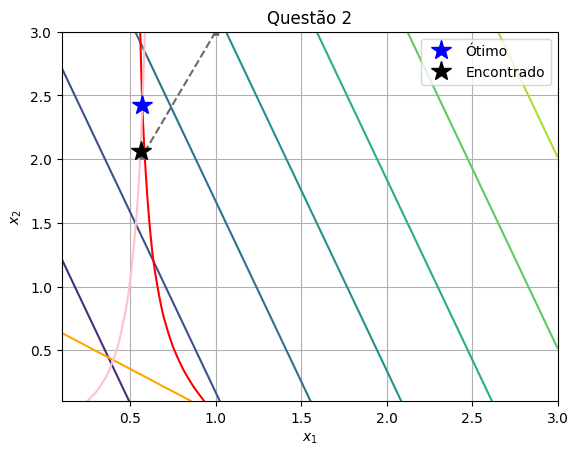

In [431]:
# Malha de pontos para gráfico de contorno
x1, x2 = np.meshgrid(np.linspace(0.1, 3),
                     np.linspace(0.1, 3))

# Função objetivo
f =  (2*( 2** 0.5))*x1 + x2

# Adiciona o contorno na figura
plt.contour(x1, x2, f)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Questão 2')
plt.grid()

# Calcula e exibe curva de restrição g1(x)
g1K = -20 + 20*((x2 + (2 ** 0.5)*x1)/((x1**2)*( 2** 0.5) + 2*x1*x2))
g2K = -20 + 20/(x1 + ( 2** 0.5)*x2)
g3K = 15 - 20*((x2)/((x1**2)*( 2** 0.5) + 2*x1*x2))

plt.contour(x1, x2, g1K, levels=[0], colors=['red'])
plt.contour(x1, x2, g2K, levels=[0], colors=['orange'])
plt.contour(x1, x2, g3K, levels=[0], colors=['pink'])

# Exibe a trajetória do algoritmo
history = np.array(history)
plt.plot(history[:, 0], history[:, 1], '*--', color='dimgray')

# Marca a solução ótima do problema
plt.plot(0.57142665, 2.42328518, '*b', label='Ótimo', markersize=15)
plt.plot(x[0], x[1], '*k', label='Encontrado', markersize=15)
plt.legend()

plt.show()

Para melhor visualização, vamos aumentar o zoom para que possamos ver onde o ponto ótimo está em relação às linhas das restrições.
O ponto ótimo encontrado se situa um pouco abaixo da intersecção, na área exterior da região factíevel. Entretanto, é bom observar que mesmo estando fora da região, os valores das restrições ainda são bem próximos de 0.

RESULTADO
x-ótimo: [0.56283317 2.06615912]
Valor final de u: 2.1
Número de iterações: 4
CUSTO DA FUNÇÃO
Valor ótimo: 4.0395238166628475
Valor encontrado: 3.6580917276839973
Valor encontrado em g1: 0.6368399998917162
Valor encontrado em g2: -2.4848234187825584
Valor encontrado em g3: 0.10233171601321978
ERRO:
10.427078306763557%


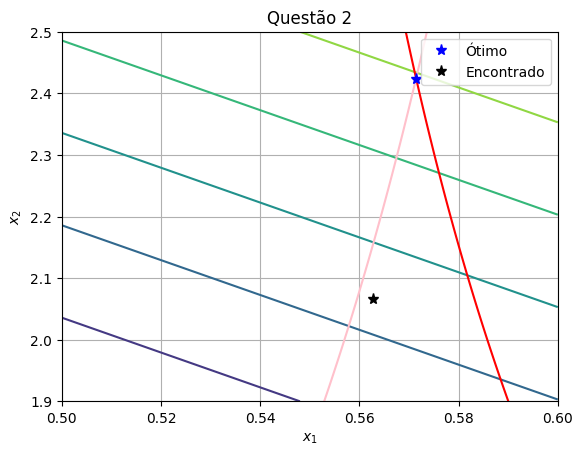

In [432]:
# Malha de pontos para gráfico de contorno
x1, x2 = np.meshgrid(np.linspace(0.5, 0.6),
                     np.linspace(1.9, 2.5))

# Função objetivo
f =  (2*( 2** 0.5))*x1 + x2

#Ponto ótimo

xOt = [0.57142665, 2.42328518]

# Adiciona o contorno na figura
plt.contour(x1, x2, f)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Questão 2')
plt.grid()

# Calcula e exibe curva de restrição g1(x)
g1K = -20 + 20*((x2 + (2 ** 0.5)*x1)/((x1**2)*( 2** 0.5) + 2*x1*x2))
g3K = 15 - 20*((x2)/((x1**2)*( 2** 0.5) + 2*x1*x2))

plt.contour(x1, x2, g1K, levels=[0], colors=['red'])
plt.contour(x1, x2, g3K, levels=[0], colors=['pink'])

# Marca a solução ótima do problema
plt.plot(xOt[0], xOt[1], '*b', label='Ótimo', markersize=8)
plt.plot(x[0], x[1], '*k', label='Encontrado', markersize=8)
plt.legend()



g1 = -20 + 20*((x[1] + (2 ** 0.5)*x[0])/((x[0]**2)*( 2** 0.5) + 2*x[0]*x[1]))
g2 = 1 - x[0] - ( 2** 0.5)*x[1]
g3 = 15 - 20*((x[1])/((x[0]**2)*( 2** 0.5) + 2*x[0]*x[1]))

# Exibe resultado
print('RESULTADO')
print('x-ótimo: ' + str(x))
print('Valor final de u: %.1f' % u)
print('Número de iterações: ' + str(k - 1)) 

print("CUSTO DA FUNÇÃO")
print("Valor ótimo: " + str(funcObj(xOt)))

#Valores das restrições no ponto ótimo encontrado(observação que o ponto está um pouco fora da região factivel, ou seja, ele chega na região pelo exterior)
print("Valor encontrado: " + str(funcObj(x)))
print("Valor encontrado em g1: " + str(g1))
print("Valor encontrado em g2: " + str(g2))
print("Valor encontrado em g3: " + str(g3))

print("ERRO:")
print(str(100*((funcObj(xOt)-funcObj(x))/funcObj(x))) + "%")


Problemas de otimização tem uma modelagem matematica e eles buscam ou minimizar ou maximizar a função objetivo, e ai vc usa de metodos computacionais pra encontrar esses pontos (o ponto otimo) isso sao restrições

# QUESTÃO 3


Para essa segunda questão, seguiremos a modelagem:

\begin{align}
x^* = min f(x,y)=(1 - x)^{2} + 100(y - x^{2})^{2} \\
    \mathrm{sujeito~a~} & 
        \begin{cases} 
            g_1(\mathbf{x, y}):~& (x - 1)^{3} - y + 1 \leq 0\\ 
            g_2(\mathbf{x, y}):~&  x + y - 2\leq 0\\  
            g_3(\mathbf{x, y}):~& -1.5 - x \leq 0\\ 
            g_4(\mathbf{x, y}):~& x - 1.5\leq 0 \\
            g_5(\mathbf{x, y}):~& -0.5 - y\leq 0 \\
            g_6(\mathbf{x, y}):~& y - 2.5\leq 0
        \end{cases}

\end{align}

Primeiramente, iremos mostrar graficamente o problema para uma melhor visão. 


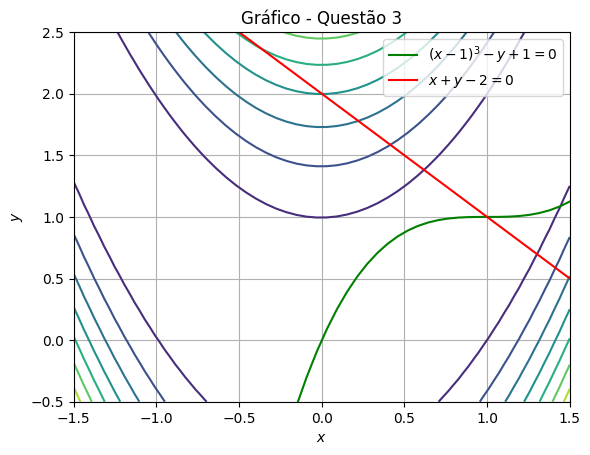

In [435]:
# Definição da malha de pontos
x, y = np.meshgrid(np.linspace(-1.5, 1.5),
                   np.linspace(-0.5, 2.5))

# Calcula f(x) e exibe gráfico de contorno
f = (1 - x)**2 + 100 * (y - x**2)**2
plt.contour(x, y, f)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title('Gráfico - Questão 3')
plt.grid()

# Calcula e exibe curva de restrição g1
x1 = np.linspace(-1.5, 1.5)
Y1 = 1 + (x1 - 1)**3 
plt.plot(x1, Y1, 'green', label=r'$(x-1)^3-y+1= 0$')

# Calcula e exibe curva de restrição g2
x2 = np.linspace(-1.5, 1.5)
y2 = 2 - x2
plt.plot(x2, y2, 'red', label=r'$x+y-2=0$')

plt.xlim([-1.5, 1.5])
plt.ylim([-0.5, 2.5])
plt.legend()

plt.show()


### Escolha do Ponto

Como estaremos utilizando o método de penalidade interior, é necessário se garantir que o ponto inicial está dentro da região factivel. Para isso, utilozaremos uma lógica de níveis das restrições.

As linhas em ciano representam o nível 0 das restrições, e as em azul o nível -0.2. Como todas as restrições no final devem ser negativas, a região factível de cada restrição é a região que contém a linha azul partindo da linha verde-água, e a intersecção de todas essas regiões, é a do problema total.

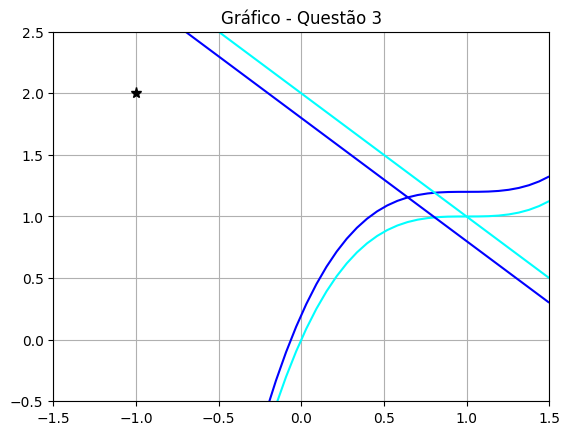

In [436]:
# Definição da malha de pontos
x, y = np.meshgrid(np.linspace(-1.5, 1.5),
                   np.linspace(-0.5, 2.5))

plt.title('Gráfico - Questão 3')
plt.grid()

# Calcula e exibe curva de restrição g1
g1 = (x - 1)**3 - y + 1
g2 = x + y - 2

plt.contour(x, y, g1, levels=[-.2, 0], colors=['blue', 'aqua'])
plt.contour(x, y, g2, levels=[-.2, 0], colors=['blue', 'aqua'])

plt.plot(-1, 2, '*k', markersize=8)

plt.xlim([-1.5, 1.5])
plt.ylim([-0.5, 2.5])

plt.show()


### Definição das funções e termos

Para resolver este problema restrito, iremos utilizar o Método de Penalidades Interior. Para isso, devemos alterar a função objetivo para uma que leve em consideração as restrições. Para montar a função objetivo nova, temos o modelo:

\begin{align}
    min f(x) - u\left\{ \sum_{i=1}^{l}\frac{1}{g_{i}(x)}\right\}
\end{align}


In [439]:
def funcObj(vars):
    x1, x2 = vars[0], vars[1]
    return (1 - x1)**2 + 100 * (x2 - x1**2)**2

def g1(vars):
    x1, x2, u = vars[0], vars[1], vars[2]
    return -u/(1 + (x1 - 1)**3 - x2)

def g2(vars):
    x1, x2, u = vars[0], vars[1], vars[2]
    return -u/(-2 + x1 + x2)

def g3(vars):
    x1, u = vars[0], vars[1]
    return - u/(x1 - 1.5)

def g4(vars):
    x1, u = vars[0], vars[1]
    return -u/(-1.5 - x1)

def g5(vars):
    x2, u = vars[0], vars[1]
    return -u/(x2 - 2.5)

def g6(vars):
    x2, u = vars[0], vars[1]
    return -u/(-0.5 - x2)

### Processo iterativo

In [447]:
# Parâmetros
precisao = 1e-4 # Precisão: percentual de diferença de x entre duas gerações
u = 1. # Valor inicial de u
alpha = 0.9 # Aceleração do valor de u
xlast = np.array([np.inf, np.inf]) # Último valor de u
iteracoes = 1 # Contador de iterações
x0 = np.array([-1, 2], dtype=float) # Ponto inicial

while True:
    # Define a nova função-objetivo
    def fh(vars):
        x1, x2 = vars[0], vars[1]
        return funcObj([x1, x2]) + g1([x1, x2, u]) + g2([x1, x2, u]) + g3([x1, u]) + g4([x1, u]) + g5([x2, u]) + g6([x2, u])
    
    # Determina o ponto de ótimo através de um método de otimização irrestrita
    solution = optimize.minimize(fh, x0, method='Nelder-Mead')
    xopt = solution.x
    fopt = solution.fun
    
    # Se o percentual de diferença entre os dois últimos ótimos forem muito pequenos, pare
    if np.linalg.norm((xopt-xlast)/xopt) < precisao:
        break
    
    # Senão, aumente u
    else:
        xlast = xopt
        u = alpha*u
        iteracoes += 1

# Exibe resultado

xOt = [1, 1]

print('RESULTADO')
print('x-ótimo: ' + str(xopt))
print('Valor final de u: %.1e' % u)
print('Número de iterações: %d' % iteracoes)

print("PROBLEMA RESTRITO")
print("Valor encontrado:" + str(funcObj(xopt)))
print("Valor ótimo:" + str(funcObj(xOt)))

print("ERRO:")
print("Erro x1: " + str(100*((xOt[0]- xopt[0])/xopt[0])) + "%")
print("Erro x2: " + str(100*((xOt[1]- xopt[1])/xopt[1])) + "%")

RESULTADO
x-ótimo: [0.96938565 0.99997131]
Valor final de u: 5.7e-03
Número de iterações: 50
PROBLEMA RESTRITO
Valor encontrado:0.3640973900439784
Valor ótimo:0
ERRO:
Erro x1: 3.1581188589925673%
Erro x2: 0.002869377131833418%


C:\Users\poop01\AppData\Local\Temp\ipykernel_7856\2775440298.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  return -u/(1 + (x1 - 1)**3 - x2)
C:\Users\poop01\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_optimize.py:863: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
